In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [74]:
 class GradientBoosting:
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.regression = regression
        
        self.trees = []
        for _ in range(n_estimators):
            tree = DecisionTreeRegressor(min_samples_split=self.min_samples_split, 
                                         max_depth=self.max_depth)
            self.trees.append(tree)
            
    def get_residuals(self, Y, Y_pred):
        return Y - Y_pred
            
    def fit(self, X, Y):
        self.starting_mean = np.mean(Y)
        Y_pred = np.full(len(Y), self.starting_mean).reshape(-1,1)
        for i in range(self.n_estimators):
            print(i)
            residuals = self.get_residuals(Y, Y_pred)
            self.trees[i].fit(X, residuals)
            print(residuals.shape)
            new_pred = self.trees[i].predict(X)
            print(new_pred.shape)
            Y_pred -= self.learning_rate * new_pred
            
    def predict(self, X):
        Y_pred = self.starting_mean
        for tree in self.trees:
            new_pred = trees.predict(X)
            Y_pred += self.learning_rate * new_pred
        return Y_pred
    
class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=200, learning_rate=0.5, 
                 min_samples_split=2, max_depth=4):
        super().__init__(n_estimators=n_estimators, 
                         learning_rate=learning_rate,
                         min_samples_split=min_samples_split, 
                         max_depth=max_depth,
                         regression=True)

0
(100, 1)
(100,)


ValueError: non-broadcastable output operand with shape (100,1) doesn't match the broadcast shape (100,100)

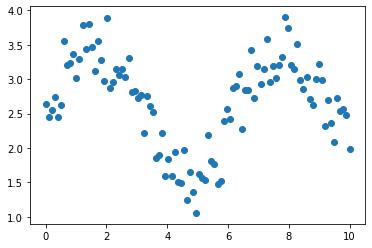

In [75]:
X = np.linspace(0, 10, 100)
Y = 2 + np.sin(X) + np.random.rand(100)
plt.scatter(X, Y)

model = GradientBoostingRegressor()
model.fit(X.reshape(-1,1), Y.reshape(-1, 1))
Y_pred = model.predict(X)

In [53]:
DecisionTreeRegressor().fit(X, Y).predict(X).shape

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.5050505
  0.6060606   0.7070707   0.8080808   0.90909094  1.010101    1.1111112
  1.2121212   1.3131313   1.4141414   1.5151515   1.6161616   1.7171717
  1.8181819   1.919192    2.020202    2.121212    2.2222223   2.3232324
  2.4242425   2.5252526   2.6262627   2.7272727   2.8282828   2.929293
  3.030303    3.131313    3.2323232   3.3333333   3.4343433   3.5353534
  3.6363637   3.7373738   3.838384    3.939394    4.040404    4.141414
  4.242424    4.3434343   4.4444447   4.5454545   4.646465    4.7474747
  4.848485    4.949495    5.050505    5.151515    5.2525253   5.353535
  5.4545455   5.5555553   5.6565657   5.757576    5.858586    5.959596
  6.060606    6.1616163   6.262626    6.3636365   6.4646463   6.5656567
  6.6666665   6.767677    6.8686867   6.969697    7.070707    7.171717
  7.2727275   7.3737373   7.4747477   7.5757575   7.676768    7.7777777
  7.878788    7.979798    8.080808    8.181818    8.282828    8.383839
  8.484848    8.585858    8.686869    8.787879    8.888889    8.989899
  9.090909    9.191919    9.29293     9.393939    9.494949    9.59596
  9.69697     9.797979    9.89899    10.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
trees = [DecisionTreeRegressor() for i in range(5)]
starting_mean = np.mean(Y)
Y_pred = np.full(len(Y), starting_mean)
for i in range(5):
    residuals = Y - Y_pred
    trees[i].fit(X, residuals)
    new_pred = self.trees[i].predict(X)
    Y_pred -= learning_rate * new_pred

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.5050505
  0.6060606   0.7070707   0.8080808   0.90909094  1.010101    1.1111112
  1.2121212   1.3131313   1.4141414   1.5151515   1.6161616   1.7171717
  1.8181819   1.919192    2.020202    2.121212    2.2222223   2.3232324
  2.4242425   2.5252526   2.6262627   2.7272727   2.8282828   2.929293
  3.030303    3.131313    3.2323232   3.3333333   3.4343433   3.5353534
  3.6363637   3.7373738   3.838384    3.939394    4.040404    4.141414
  4.242424    4.3434343   4.4444447   4.5454545   4.646465    4.7474747
  4.848485    4.949495    5.050505    5.151515    5.2525253   5.353535
  5.4545455   5.5555553   5.6565657   5.757576    5.858586    5.959596
  6.060606    6.1616163   6.262626    6.3636365   6.4646463   6.5656567
  6.6666665   6.767677    6.8686867   6.969697    7.070707    7.171717
  7.2727275   7.3737373   7.4747477   7.5757575   7.676768    7.7777777
  7.878788    7.979798    8.080808    8.181818    8.282828    8.383839
  8.484848    8.585858    8.686869    8.787879    8.888889    8.989899
  9.090909    9.191919    9.29293     9.393939    9.494949    9.59596
  9.69697     9.797979    9.89899    10.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
#trees[1].fit(X, residuals.reshape(-1, 1))
X

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96